<a href="https://colab.research.google.com/github/MStamirski/Faces/blob/main/Model_glasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/Colab_Notebooks/SDA_upskill/Faces"

In [ ]:
!pip install import-ipynb

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.metrics import Precision
from keras.metrics import Recall
import import_ipynb

# Import custom functions

In [ ]:
from Dataset_prep import get_labels, get_faces

In [ ]:
from Functions import prepare_data, plot_history
from Functions import show_metrics, get_best_threshold, get_tuned_prediction, make_prediction
from Functions import show_prediction, show_predictions

# Data for model

In [ ]:
labels = get_labels()
faces, sex, hair, glasses, hat, beard = get_faces(labels, 'photos_dst/')

Processing face nr 1349
Created dataset contains 5300 faces.


In [ ]:
X, y = prepare_data(faces, glasses, 'Y')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=43)

# Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape = [64, 64, 1]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation ='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision(name='precision'), Recall(name='recall')])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       32896     
                                                                 
 flatten_1 (Flatten)         (None, 25088)            

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
53/53 [==============================] - 3s 16ms/step - loss: 0.3796 - precision: 0.1633 - recall: 0.0184 - val_loss: 0.3246 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
53/53 [==============================] - 1s 11ms/step - loss: 0.2815 - precision: 0.7941 - recall: 0.1862 - val_loss: 0.2592 - val_precision: 0.6040 - val_recall: 0.5980
Epoch 3/20
53/53 [==============================] - 1s 10ms/step - loss: 0.2003 - precision: 0.8043 - recall: 0.5103 - val_loss: 0.1782 - val_precision: 0.8101 - val_recall: 0.6275
Epoch 4/20
53/53 [==============================] - 1s 13ms/step - loss: 0.1546 - precision: 0.8649 - recall: 0.6621 - val_loss: 0.1591 - val_precision: 0.9130 - val_recall: 0.6176
Epoch 5/20
53/53 [==============================] - 1s 13ms/step - loss: 0.1172 - precision: 0.8848 - recall: 0.7241 - val_loss: 0.1541 - val_precision: 0.8553 - val_recall: 0.6373
Epoch 6/20
53/53 [==============================] - 1s 14ms/step - loss: 0.1033 - preci

# Outcome

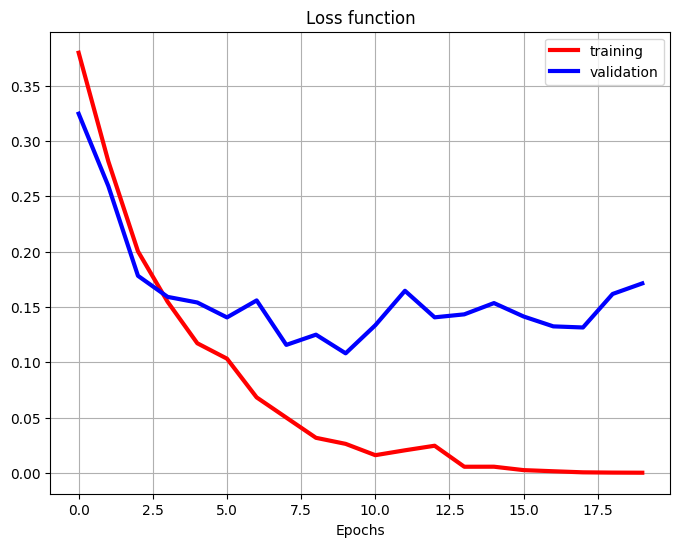

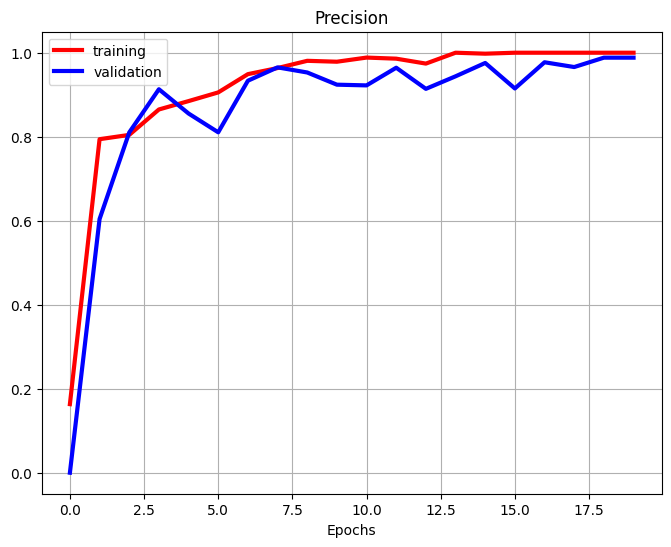

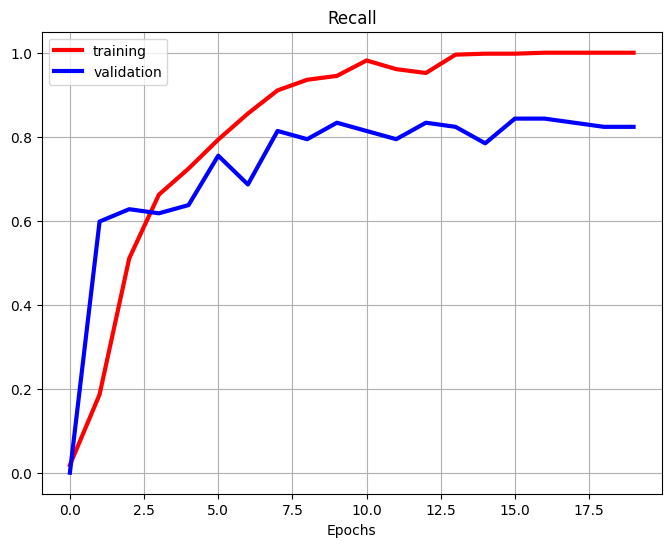

In [ ]:
plot_history(history)

In [ ]:
y_pred_tuned = make_prediction(model, X_test, y_test)

34/34 [==============================] - 0s 2ms/step

Metrics before tuning
Precision: 0.9203540086746216
Recall: 0.8739495873451233
F1 Score: 0.8965516686439514

Best threshold: 0.35000000000000003

Metrics after tuning
Precision: 0.9210526347160339
Recall: 0.8823529481887817
F1 Score: 0.9012876152992249


============ Predictions for label value 0 ===================


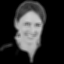

Label value: 0, Prediction: 0



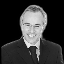

Label value: 0, Prediction: 0



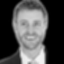

Label value: 0, Prediction: 0



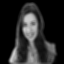

Label value: 0, Prediction: 0



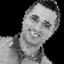

Label value: 0, Prediction: 0


============ Predictions for label value 1 ===================


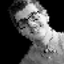

Label value: 1, Prediction: 1



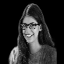

Label value: 1, Prediction: 1



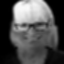

Label value: 1, Prediction: 1



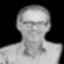

Label value: 1, Prediction: 1



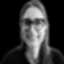

Label value: 1, Prediction: 1



In [ ]:
show_predictions(X_test, y_test, y_pred_tuned)